### Import các thư viện cần thiết

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Đọc dữ liệu đã qua xử lý ở SQL

In [60]:
### Data đã được transform để train model
df = pd.read_excel("C:/Users/Admin/Documents/momo test/data_to_train.xlsx")
df

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0,1005336,0,1,3,685,336,300.0,1,10000,0
1,10054894,0,1,3,531,59,2000.0,1,100000,1
2,10055943,0,1,3,254,53,600.0,1,20000,0
3,10066290,0,0,4,792,234,400.0,1,20000,0
4,10066423,0,0,6,1288,255,600.0,1,20000,0
...,...,...,...,...,...,...,...,...,...,...
13385,997497,1,1,5,1368,227,2000.0,1,50000,1
13386,9978082,0,0,2,653,221,200.0,1,10000,0
13387,9981781,0,0,6,290,184,1000.0,1,50000,0
13388,9993038,1,0,6,407,304,400.0,1,10000,0


In [61]:
### Data dùng để EDA
data = pd.read_excel("C:/Users/Admin/Documents/momo test/data to explore.xlsx")
data

,User_id,First_tran_date,Location,Age,Gender,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0,1005336,2019-02-15,Other Cities,28_to_32,MALE,0,1,3,685,336,300.0,1,10000,0
1,10054894,2019-07-19,Other Cities,28_to_32,MALE,0,1,3,531,59,2000.0,1,100000,1
2,10055943,2020-04-21,Other Cities,28_to_32,MALE,0,1,3,254,53,600.0,1,20000,0
3,10066290,2018-10-31,Other Cities,33_to_37,FEMALE,0,0,4,792,234,400.0,1,20000,0
4,10066423,2017-06-22,Unknown,unknown,FEMALE,0,0,6,1288,255,600.0,1,20000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,997497,2017-04-03,HCMC,>37,MALE,1,1,5,1368,227,2000.0,1,50000,1
13386,9978082,2019-03-19,Other Cities,23_to_27,FEMALE,0,0,2,653,221,200.0,1,10000,0
13387,9981781,2020-03-16,Other Cities,unknown,FEMALE,0,0,6,290,184,1000.0,1,50000,0
13388,9993038,2019-11-20,HCMC,unknown,FEMALE,1,0,6,407,304,400.0,1,10000,0


### 1. EDA data

In [8]:
data.describe()

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
count,1.339000e+04,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,13390.000000,1.339000e+04,13390.000000
mean,4.023616e+07,0.417999,0.582226,3.369081,568.710381,174.077894,1397.515087,1.007842,5.187485e+04,0.164899
std,1.366588e+07,0.493248,0.493211,1.676727,349.780141,105.263778,2129.931164,0.091533,7.426679e+04,0.371103
min,1.138060e+05,0.000000,0.000000,1.000000,0.000000,0.000000,200.000000,1.000000,1.000000e+04,0.000000
25%,3.604542e+07,0.000000,0.000000,2.000000,319.000000,83.000000,400.000000,1.000000,2.000000e+04,0.000000
50%,4.348110e+07,0.000000,1.000000,3.000000,477.500000,171.000000,800.000000,1.000000,3.000000e+04,0.000000
75%,4.942659e+07,1.000000,1.000000,5.000000,758.000000,265.000000,2000.000000,1.000000,5.000000e+04,0.000000
max,6.143328e+07,1.000000,1.000000,6.000000,1826.000000,365.000000,100000.000000,3.000000,2.500000e+06,1.000000


- Urban_flag: Whether customers reside in two major cities or not.
- Gender_flag: Male:1; Female: 0
- Age_rank: case when age = '18_to_22' then 1
when age = '23_to_27' then 2
when age = '28_to_32' then 3
when age = '33_to_37' then 4
when age = '>37' then 5
else 6
- Relationshp_time: Duration of the customer relationship. (Days)
- Recency: The number of days elapsed since the customer's last transaction to the reporting date. (Days)
- Revenue
- Frequency: The number of customer transactions. (VND)
- Monetary: Amount of customer transactions. (VND)
- Behaft: Whether the customer is buying on behalf of others (1) or for themselves (0)


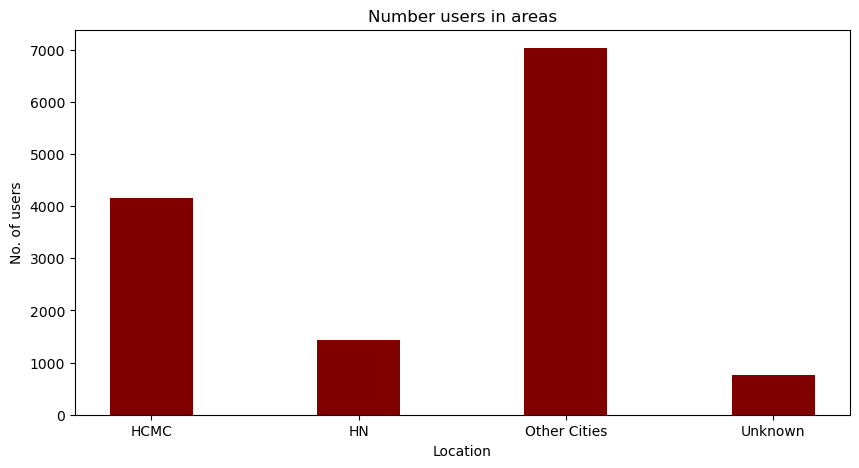

In [9]:
df_1 = data.groupby('Location')['User_id'].count().reset_index()
# df_1 = df_1.rename(columns={'Value': 'User_id'})
location = list(df_1.Location)
values = list(df_1.User_id)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(location, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Location")
plt.ylabel("No. of users")
plt.title("Number users in areas")
plt.show()

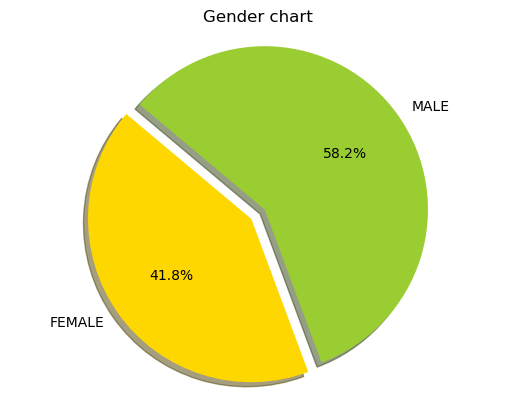

In [11]:
df_1=data.groupby('Gender')['User_id'].count().reset_index()
label = data.Gender.drop_duplicates().sort_values(ascending=True).to_list()
# Dữ liệu mẫu
labels = list(label)
sizes = list(df_1.User_id)

# Màu sắc cho các phần
colors = ['gold', 'yellowgreen']

# Explode: tách một phần ra
explode = (0.1, 0)

# Vẽ biểu đồ pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Đặt tiêu đề của biểu đồ
plt.title('Gender chart')

# Hiển thị biểu đồ
plt.axis('equal')  # Để làm cho biểu đồ hình tròn
plt.show()


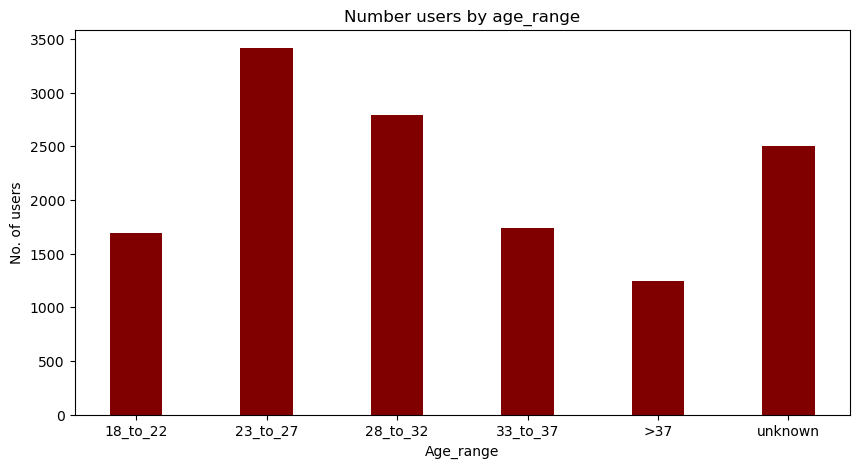

In [17]:
df_1 = data.groupby('Age')['User_id'].count().reset_index()
# df_1 = df_1.rename(columns={'Value': 'User_id'})
age = list(df_1.Age)
values = list(df_1.User_id)
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(age, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Age_range")
plt.ylabel("No. of users")
plt.title("Number users by age_range")
plt.show()

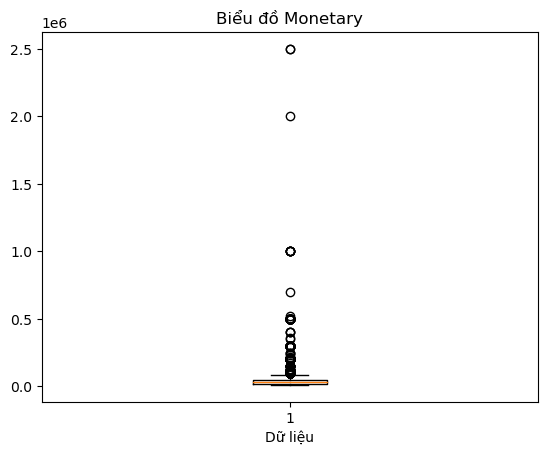

In [29]:
plt.boxplot(df.monetary)
plt.title('Biểu đồ Monetary')
plt.xlabel('Dữ liệu')
plt.show()


#### 1.1 Xử lý outliers

In [30]:
# Hàm xử lý outlier bằng IQR cho một cột và cập nhật giá trị ngoại lệ thành upper_bound
def update_outliers_to_upper_bound(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    column[column > upper_bound] = upper_bound
    return column

# Áp dụng hàm xử lý outlier cho từng cột trong DataFrame
df['monetary'] = df[['monetary']].apply(update_outliers_to_upper_bound)

In [31]:
update_outliers_to_upper_bound(df.monetary)

0        10000
1        95000
2        20000
3        20000
4        20000
         ...  
13385    50000
13386    10000
13387    50000
13388    10000
13389    10000
Name: monetary, Length: 13390, dtype: int64

##### Dữ liệu transantion quá ít dẫn đến Frequency bị bias, mỗi khách hàng trong vòng 1 năm chỉ có 1 GD, SLKH có 2GD trở lên rất ít. 
##### Tạm thời loại không sử dụng biến này cho mô hình

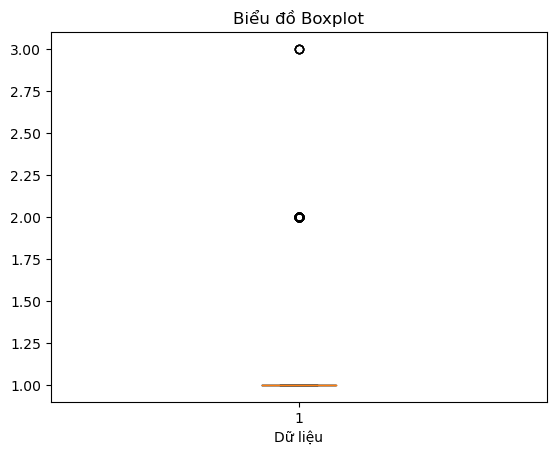

In [28]:
plt.boxplot(df.frequency)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()

#### Monetary sau khi xử lý outliers.

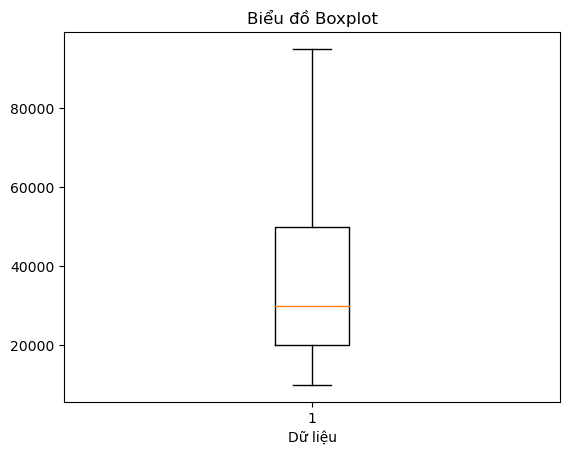

In [32]:
plt.boxplot(df.monetary)
plt.title('Biểu đồ Boxplot')
plt.xlabel('Dữ liệu')
plt.show()

#### Xem correlation giữa các biến. Do Revenue và Recency có tương quan khá cao nên chỉ sử dụng 1 trong 2 biến. ==> Sử dụng biến Recency

                    User_id  urban_flag  gender_flag  age_rank  \
User_id            1.000000   -0.100069    -0.001053 -0.031621   
urban_flag        -0.100069    1.000000    -0.028772 -0.089472   
gender_flag       -0.001053   -0.028772     1.000000 -0.047267   
age_rank          -0.031621   -0.089472    -0.047267  1.000000   
relationship_time -0.328113    0.159133     0.027745 -0.071395   
recency           -0.067586    0.088749     0.006177 -0.045641   
revenue           -0.045033    0.026392     0.037864  0.062516   
frequency         -0.019956    0.010108    -0.000221 -0.004747   
monetary          -0.053184    0.022029     0.054101  0.085188   
behaft            -0.051652    0.022874     0.005895  0.055103   

                   relationship_time   recency   revenue  frequency  monetary  \
User_id                    -0.328113 -0.067586 -0.045033  -0.019956 -0.053184   
urban_flag                  0.159133  0.088749  0.026392   0.010108  0.022029   
gender_flag                 0.

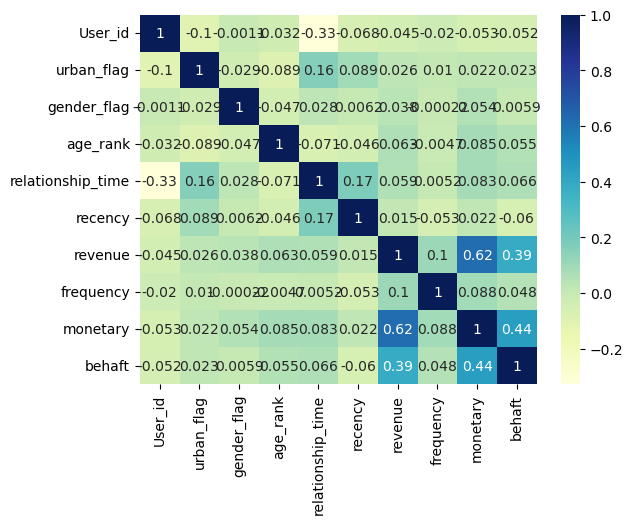

In [33]:

# import modules 
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 
  

# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(df.corr()) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show() 

In [34]:
value = np.unique(df[['User_id']])
len(value)

13390

### 2. Train model

In [35]:
df_segmentation = df.copy()

In [36]:
df_segmentation

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0,1005336,0,1,3,685,336,300.0,1,10000,0
1,10054894,0,1,3,531,59,2000.0,1,95000,1
2,10055943,0,1,3,254,53,600.0,1,20000,0
3,10066290,0,0,4,792,234,400.0,1,20000,0
4,10066423,0,0,6,1288,255,600.0,1,20000,0
...,...,...,...,...,...,...,...,...,...,...
13385,997497,1,1,5,1368,227,2000.0,1,50000,1
13386,9978082,0,0,2,653,221,200.0,1,10000,0
13387,9981781,0,0,6,290,184,1000.0,1,50000,0
13388,9993038,1,0,6,407,304,400.0,1,10000,0


#### By the below plot, we can see that there is a kink at k=3. (the optimal number of clusters in K-means clustering.)

#### Hence k=3 can be considered a good number of the cluster to cluster this data.

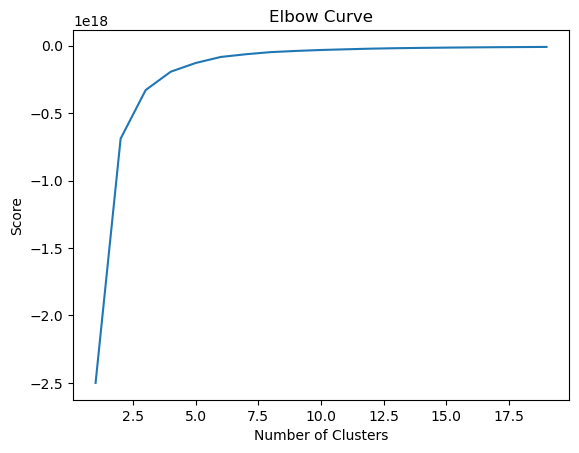

In [37]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_segmentation).score(df_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_segmentation)

In [39]:
df_segmentation['cluster'] = kmeans.labels_

In [40]:
#check our hypothesis

df_segmentation[df_segmentation.cluster == 0].head(10)

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft,cluster
6840,44601124,0,1,6,700,164,8000.0,1,95000,1,0
6841,44603808,0,1,1,675,196,400.0,1,10000,0,0
6842,44608981,0,0,6,749,225,1000.0,1,50000,0,0
6843,44609573,0,1,6,749,171,3000.0,1,95000,0,0
6844,44614070,1,0,2,519,131,6000.0,1,95000,1,0
6845,44614948,0,0,2,413,66,800.0,1,20000,1,0
6846,44615277,0,1,4,438,20,2000.0,1,95000,1,0
6847,44617121,0,0,2,413,338,1000.0,1,50000,0,0
6848,44619915,0,0,3,748,93,4000.0,1,95000,1,0
6849,44621869,1,1,4,743,243,1500.0,1,50000,0,0


#### SLKH mỗi nhóm sau khi cluster

In [41]:
df_segmentation.groupby('cluster')['User_id'].count()

cluster
0    6049
1    1919
2    5422
Name: User_id, dtype: int64

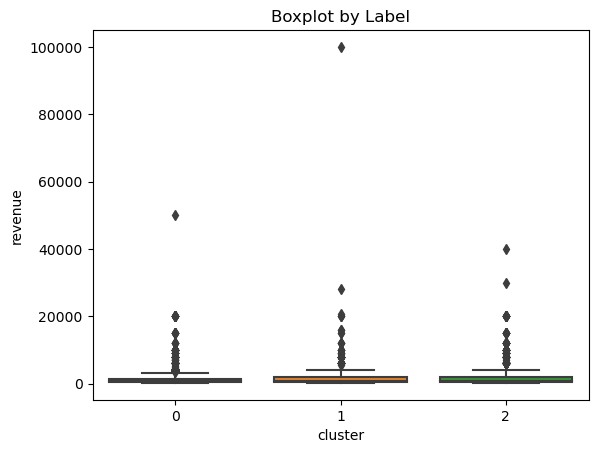

In [42]:
data = df_segmentation[["revenue","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='revenue', data=df_1)
plt.xlabel('cluster')
plt.ylabel('revenue')
plt.title('Boxplot by Label')
plt.show()


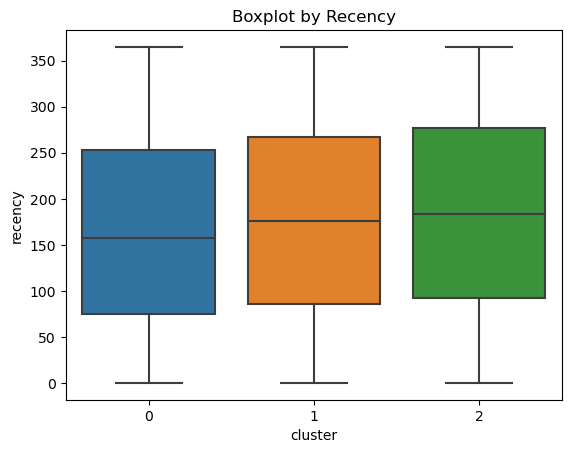

In [43]:
data = df_segmentation[["recency","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='recency', data=df_1)
plt.xlabel('cluster')
plt.ylabel('recency')
plt.title('Boxplot by Recency')
plt.show()


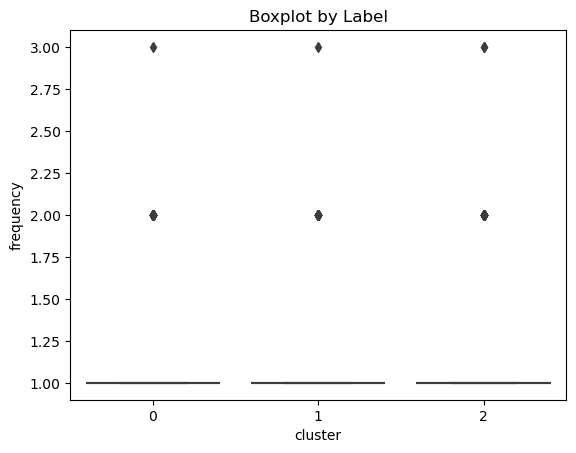

In [44]:
data = df_segmentation[["frequency","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='frequency', data=df_1)
plt.xlabel('cluster')
plt.ylabel('frequency')
plt.title('Boxplot by Label')
plt.show()

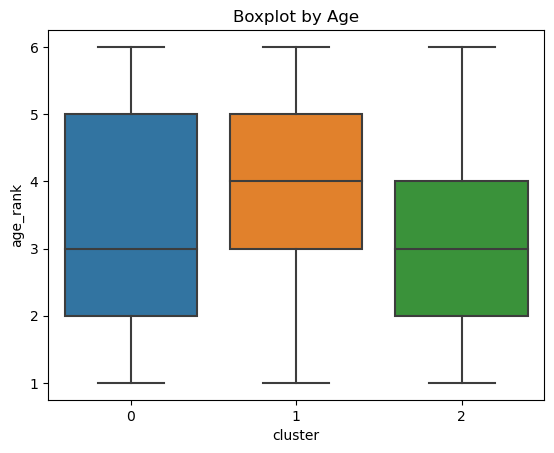

In [45]:
data = df_segmentation[["age_rank","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='age_rank', data=df_1)
plt.xlabel('cluster')
plt.ylabel('age_rank')
plt.title('Boxplot by Age')
plt.show()

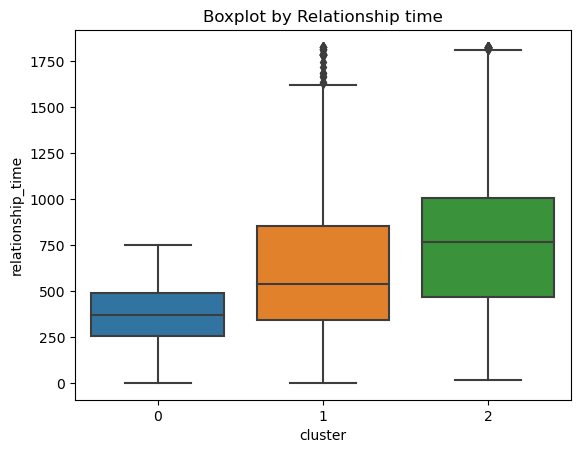

In [46]:
data = df_segmentation[["relationship_time","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='relationship_time', data=df_1)
plt.xlabel('cluster')
plt.ylabel('relationship_time')
plt.title('Boxplot by Relationship time')
plt.show()

   cluster  behaft  value
0        0       0   5171
1        0       1    878
2        1       0   1556
3        1       1    363
4        2       0   4455
5        2       1    967


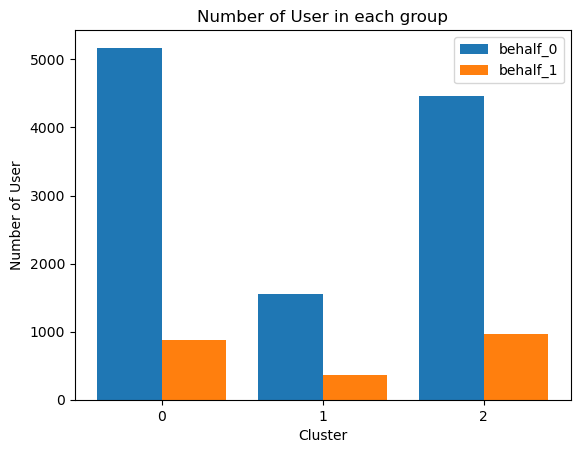

In [47]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["behaft","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','behaft']).sum().reset_index()
print(df_1)
behalf_0 = df_1[df_1['behaft']==0]['value'].to_list()
behalf_1 = df_1[df_1['behaft']==1]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, behalf_0, 0.4, label = 'behalf_0') 
plt.bar(X_axis + 0.2, behalf_1, 0.4, label = 'behalf_1') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

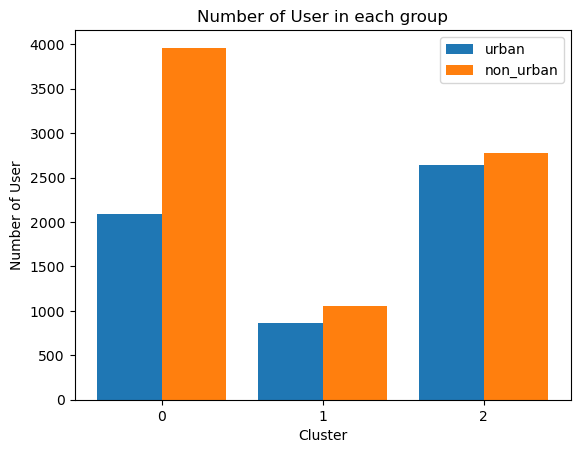

In [48]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["urban_flag","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)
df_1

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','urban_flag']).sum().reset_index()
df_1
urban = df_1[df_1['urban_flag']==1]['value'].to_list()
non_urban = df_1[df_1['urban_flag']==0]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, urban, 0.4, label = 'urban') 
plt.bar(X_axis + 0.2, non_urban, 0.4, label = 'non_urban') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

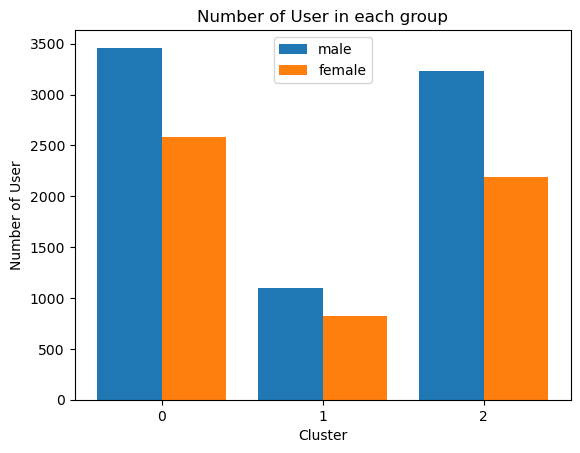

In [49]:
X = df_segmentation.cluster.drop_duplicates().sort_values(ascending=True).to_list()
data=df_segmentation[["gender_flag","cluster"]]
df_1 = pd.DataFrame(data)
df_1.sort_values('cluster', ascending = True)
df_1

df_1['value'] = 1
df_1 = df_1.groupby(['cluster','gender_flag']).sum().reset_index()
df_1
male = df_1[df_1['gender_flag']==1]['value'].to_list()
female = df_1[df_1['gender_flag']==0]['value'].to_list()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'male') 
plt.bar(X_axis + 0.2, female, 0.4, label = 'female') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Cluster") 
plt.ylabel("Number of User") 
plt.title("Number of User in each group") 
plt.legend() 
plt.show() 

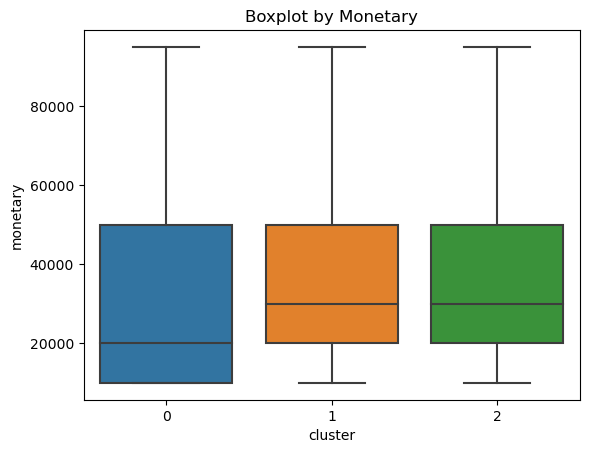

In [50]:
data = df_segmentation[["monetary","cluster"]]

df_1 = pd.DataFrame(data)
# order = ['B0', 'B1','B2','B3','B4']
# # Vẽ boxplot theo nhãn bằng seaborn
sns.boxplot(x='cluster', y='monetary', data=df_1)
plt.xlabel('cluster')
plt.ylabel('monetary')
plt.title('Boxplot by Monetary')
plt.show()

### 3.Score RFM

In [51]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [52]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''
quantile = df.quantile(q=[0.25,0.5,0.75])
quantile

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft
0.25,36045415.75,0.0,0.0,2.0,319.0,83.0,400.0,1.0,20000.0,0.0
0.50,43481099.50,0.0,1.0,3.0,477.5,171.0,800.0,1.0,30000.0,0.0
0.75,49426589.75,1.0,1.0,5.0,758.0,265.0,2000.0,1.0,50000.0,0.0


In [56]:
df_segmentation['R_Quartile'] = df_segmentation['recency'].apply(RScore,args=('recency',quantile))
df_segmentation['F_Quartile'] = df_segmentation['frequency'].apply(FMScore, args=('frequency',quantile))
df_segmentation['M_Quartile'] = df_segmentation['monetary'].apply(FMScore, args=('monetary',quantile))

In [57]:
quantile.to_dict()

{'User_id': {0.25: 36045415.75, 0.5: 43481099.5, 0.75: 49426589.75},
 'urban_flag': {0.25: 0.0, 0.5: 0.0, 0.75: 1.0},
 'gender_flag': {0.25: 0.0, 0.5: 1.0, 0.75: 1.0},
 'age_rank': {0.25: 2.0, 0.5: 3.0, 0.75: 5.0},
 'relationship_time': {0.25: 319.0, 0.5: 477.5, 0.75: 758.0},
 'recency': {0.25: 83.0, 0.5: 171.0, 0.75: 265.0},
 'revenue': {0.25: 400.0, 0.5: 800.0, 0.75: 2000.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 20000.0, 0.5: 30000.0, 0.75: 50000.0},
 'behaft': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}}

In [58]:
df_segmentation['RFMScore'] = df_segmentation.R_Quartile.map(str) \
                            + df_segmentation.F_Quartile.map(str) \
                            + df_segmentation.M_Quartile.map(str)
df_segmentation.head()

,User_id,urban_flag,gender_flag,age_rank,relationship_time,recency,revenue,frequency,monetary,behaft,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1005336,0,1,3,685,336,300.0,1,10000,0,1,4,4,4,444
1,10054894,0,1,3,531,59,2000.0,1,95000,1,1,1,4,1,141
2,10055943,0,1,3,254,53,600.0,1,20000,0,1,1,4,4,144
3,10066290,0,0,4,792,234,400.0,1,20000,0,1,3,4,4,344
4,10066423,0,0,6,1288,255,600.0,1,20000,0,1,3,4,4,344


In [59]:
print("Best Customers: ",len(df_segmentation[df_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(df_segmentation[df_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(df_segmentation[df_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(df_segmentation[df_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(df_segmentation[df_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(df_segmentation[df_segmentation['RFMScore']=='444']))

Best Customers:  40
Loyal Customers:  101
Big Spenders:  2942
Almost Lost:  0
Lost Customers:  1617
Lost Cheap Customers:  1563
